In [1]:
%matplotlib inline
from IPython.display import display

import os
import numpy as np 
import pandas as pd
import math as mt
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from math import pi
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
KNeighboursClassifier = KNeighborsClassifier # For the Brits!
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix 
from mpl_toolkits.mplot3d import Axes3D

D:\Anaconda\envs\py3iaml\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence
D:\Anaconda\envs\py3iaml\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# Load the dataset
data_path = os.path.join(os.getcwd(), 'winequality-red-mod.csv')
winedata1 = pd.read_csv(data_path, delimiter = ',')
winedata1.head()

,id,fixed acidity,volatile acidity,citric acid,residual sugar,flavonoids,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,country,quality
0,1,7.4,0.70,0.00,1.9,0.590,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,UK,5
1,2,7.8,0.88,0.00,2.6,0.754,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Italy,5
2,3,7.8,0.76,0.04,2.3,0.688,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Italy,5
3,4,11.2,0.28,0.56,1.9,0.459,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Spain,6
4,5,7.4,0.70,0.00,1.9,0.590,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,UK,5


In [3]:
winedata_b4Transform = winedata1.drop('id', axis =1)

In [4]:
winedata_b4Transform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1506 entries, 0 to 1505
Data columns (total 14 columns):
fixed acidity           1504 non-null float64
volatile acidity        1504 non-null float64
citric acid             1504 non-null float64
residual sugar          1504 non-null float64
flavonoids              1504 non-null float64
chlorides               1504 non-null float64
free sulfur dioxide     1504 non-null float64
total sulfur dioxide    1504 non-null float64
density                 1504 non-null float64
pH                      1504 non-null float64
sulphates               1504 non-null float64
alcohol                 1504 non-null float64
country                 1504 non-null object
quality                 1506 non-null int64
dtypes: float64(12), int64(1), object(1)
memory usage: 164.8+ KB


In [5]:
#There are two empty rows need to be removed.
winedata_b4Transform = winedata_b4Transform.dropna()

The following codes are transforming the categorical attribute,'_country_' to one hot encoding to help better visualization. Then, I restructure the data as shown

In [6]:
#Transform to label encoder (0,1,2)
le = LabelEncoder()
winedata_b4Transform['country'] = le.fit_transform(winedata_b4Transform['country']) # All rows and first column i.e country column
#print(X)

#Transform to one hot encoding
ohe = OneHotEncoder(categorical_features = [12])
winedata_Transformed = ohe.fit_transform(winedata_b4Transform).toarray()
#print(winedata_Transformed)


In [7]:
winedata_list = winedata_Transformed.tolist()
#print(winedata_list)
winedata = pd.DataFrame(winedata_list)
winedata.columns = ['Italy', 'Spain','UK', 'fixed acidity', 'volatile acidity', 'citric acid',
                       'residual sugar', 'flavonoids', 'chlorides',
                       'free sulfur dioxide', 'total sulfur dioxide', 'density',
                       'pH', 'sulphates', 'alcohol', 'quality']
#New data structure
winedata.head()

,Italy,Spain,UK,fixed acidity,volatile acidity,citric acid,residual sugar,flavonoids,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.0,0.0,1.0,7.4,0.70,0.00,1.9,0.590,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,1.0,0.0,0.0,7.8,0.88,0.00,2.6,0.754,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,1.0,0.0,0.0,7.8,0.76,0.04,2.3,0.688,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,0.0,1.0,0.0,11.2,0.28,0.56,1.9,0.459,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,0.0,0.0,1.0,7.4,0.70,0.00,1.9,0.590,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


Calculate using correlation coefficient for every attribute against '_quality_'. Heatmap is p;otted to provide more correlation details on every attribute.

In [8]:
correlations = winedata.corr()['quality'].drop('quality')
print(correlations)

Italy                   0.019167
Spain                   0.015304
UK                     -0.044594
fixed acidity           0.138583
volatile acidity       -0.377123
citric acid             0.233458
residual sugar          0.016327
flavonoids             -0.199290
chlorides              -0.085691
free sulfur dioxide    -0.049119
total sulfur dioxide   -0.185431
density                 0.045603
pH                     -0.018068
sulphates               0.253316
alcohol                 0.377449
Name: quality, dtype: float64


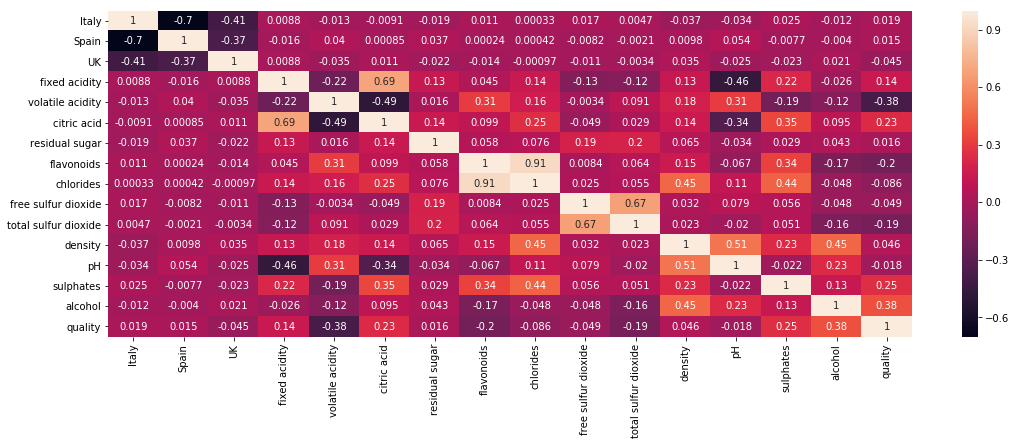

In [9]:
fig = plt.figure(figsize = (18,6))
sns.heatmap(winedata.corr(),annot=True)
plt.show()

D:\Anaconda\envs\py3iaml\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


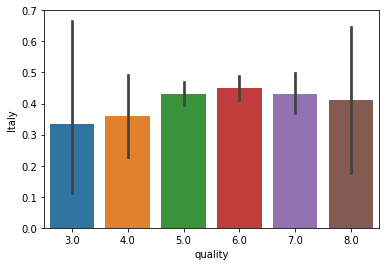

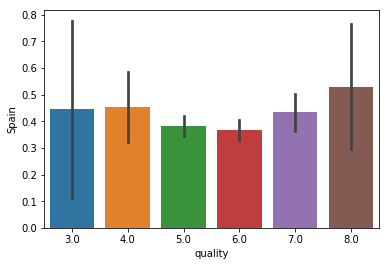

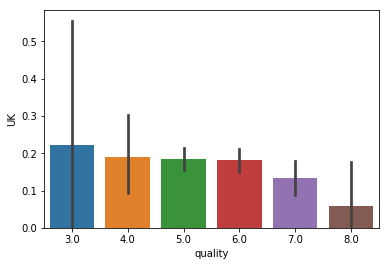

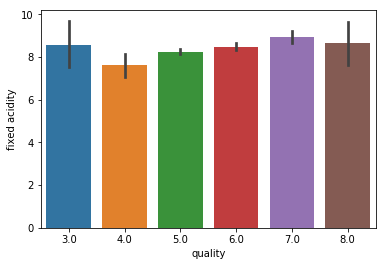

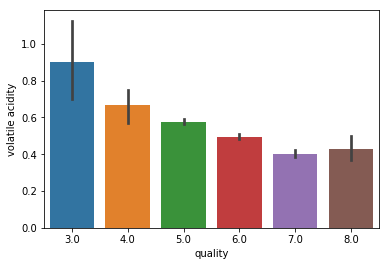

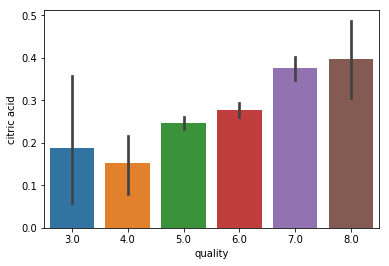

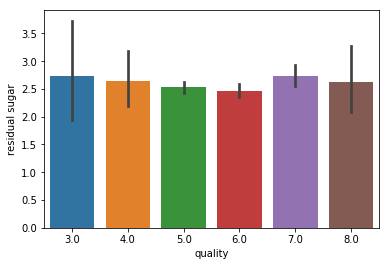

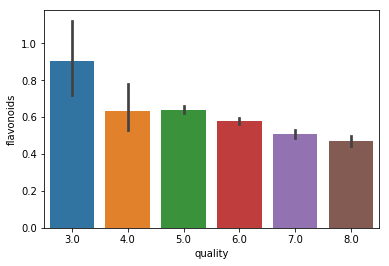

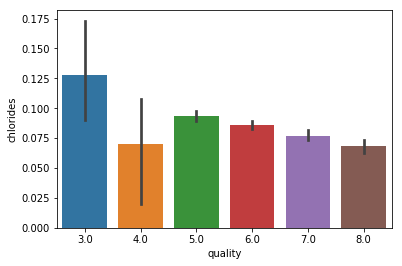

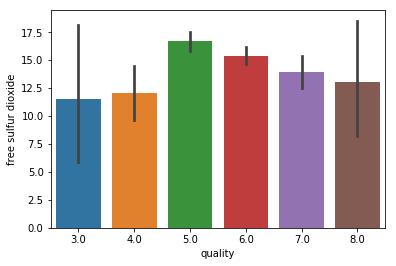

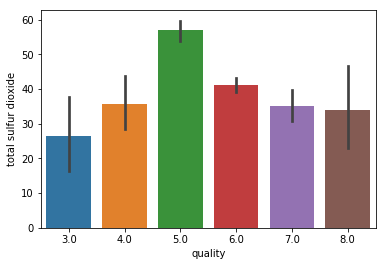

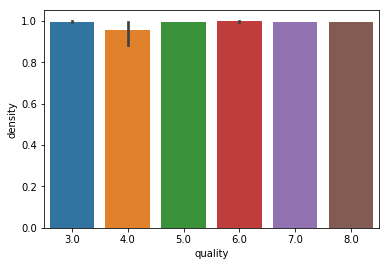

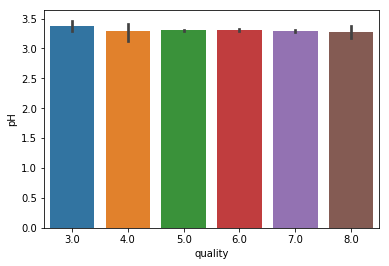

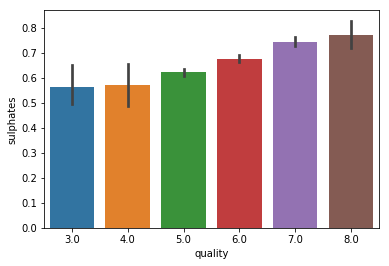

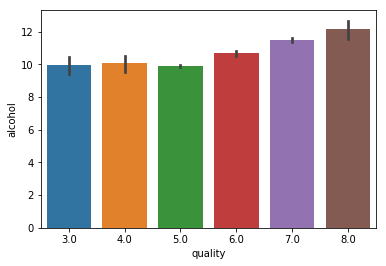

In [10]:
columns = list(winedata)

fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for idx in range(len(columns)-1): 
    sns.barplot(x = 'quality', y = columns[idx] , data = winedata)
    plt.show()

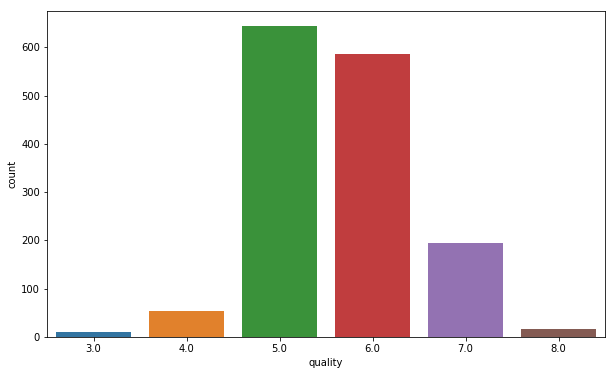

In [11]:
fig = plt.figure(figsize = (10,6))
sns.countplot(winedata['quality'])
plt.show()

# Preliminary observations
1. *alcohol* : Has the highest positive correlation coefficient score. Which can also be seen from the bar plot, the higher the alcohol content, the higher the quality of the wine.
2. *sulphates* : Has the second highest positive correlation coefficient score. The trend shown is similar with *alcohol* based on the bar plot where the higher the content of sulphates, the better the quality of wine produced.
3. *citric acid* : The third highest positive correlation coefficient score. Based on the bar plot, the quality of the wine increases as the content of citric acid increases.
4. *volatile acidity* : Volatile acidity determines how fast a wine can goes bad. The correlation coefficient score of flavonoids shows the highest negative correlation. The bar plot also showed an obvious negative relationship of low quality of wine has the largest volatile acidity.
5. *flavonoids* : The second highest negative correlation coefficient score. The bar plot clearly displayed that wine that contains high flavonoids do not produce high quality of wine.

Further analysis from the heatmap, *sulphates* content are highly correlated with several other attributes such as *cholrides* (0.44), *citric acid* (0.35) and *flavonoids* (0.34). Interestingly, we found that citric acid and flavonoids content are positively correlated in determining quality of wine in general as shown above. While the rest of the attributes do not show any significance correlation against the quality of wine. However, it seems like UK does not produce a high quality of wine in comparison to Spain and Italy. Joke aside!

In conclusion, the content of alcohol, sulphates, citric acid, volatile acidity and flavonoids are crucial to determine the quality of wine. From general knowledge, the observation is reliable as a high quality wine will have a high amount of alcohol, with low volatile acidity is desirable.

In order to apply machine learning algorithm, I decided to add a new column called *grade* which consists of one hot encoding values. Initially, I separated the *quality* attribute into bins and label them as good or bad into *grade*. Then, I apply transformation using label encoder function. The outcome is shown below. Therefore, the new target variable is *grade*.

In [12]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
winedata['grade'] = pd.cut(winedata['quality'], bins = bins, labels = group_names)
#Assign a labels to our quality variable
label_quality = LabelEncoder()
#Bad becomes 0 and good becomes 1 
winedata['grade'] = label_quality.fit_transform(winedata['grade']) # good
winedata['grade'].value_counts()

0    1292
1     212
Name: grade, dtype: int64

In [13]:
#Result of new data
winedata.head(10)

,Italy,Spain,UK,fixed acidity,volatile acidity,citric acid,residual sugar,flavonoids,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,grade
0,0.0,0.0,1.0,7.4,0.70,0.00,1.9,0.590,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,0
1,1.0,0.0,0.0,7.8,0.88,0.00,2.6,0.754,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0,0
2,1.0,0.0,0.0,7.8,0.76,0.04,2.3,0.688,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0,0
3,0.0,1.0,0.0,11.2,0.28,0.56,1.9,0.459,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0,0
4,0.0,0.0,1.0,7.4,0.70,0.00,1.9,0.590,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,0
5,0.0,1.0,0.0,7.4,0.66,0.00,1.8,0.573,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5.0,0
6,1.0,0.0,0.0,7.9,0.60,0.06,1.6,0.525,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5.0,0
7,0.0,1.0,0.0,7.3,0.65,0.00,1.2,0.520,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7.0,1
8,0.0,1.0,0.0,7.8,0.58,0.02,2.0,0.539,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7.0,1
9,1.0,0.0,0.0,7.5,0.50,0.36,6.1,0.505,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5.0,0


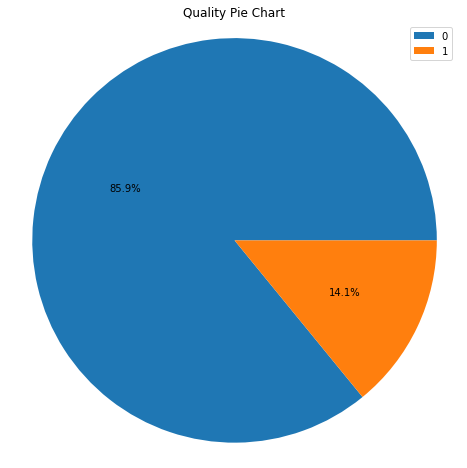

The good quality wines count for  14.1 %.


In [14]:
plt.figure(figsize = (8,8))
labels = winedata.grade.value_counts().index
plt.pie(winedata.grade.value_counts(), autopct='%1.1f%%')
plt.legend(labels, loc="best")
plt.axis('equal')
plt.title('Quality Pie Chart')
plt.show()
print('The good quality wines count for ',round(winedata.grade.value_counts(normalize=True)[1]*100,1),'%.')

In [15]:
good = winedata[winedata.grade == 1]
bad = winedata[winedata.grade == 0]

In [16]:
drop_attrs = ['quality','grade']
g1 = pd.DataFrame(good.drop(drop_attrs, axis=1).mean(), columns=['Good']).T
g2 = pd.DataFrame(bad.drop(drop_attrs, axis=1).mean(), columns=['Bad']).T
total = pd.DataFrame(winedata.drop(drop_attrs, axis=1).mean(), columns=['Total Average']).T
data = g1.append([g2, total])
data.shape

(3, 15)

In [17]:
temp1 = data.values.reshape((3, 15))
standard = data.loc['Total Average'].values.reshape((1, 15))
#print(standard)
temp = 100* temp1 / standard
#print(temp)
data_percentage = pd.DataFrame(temp, columns = data.columns.values.tolist())
#print(data_percentage)

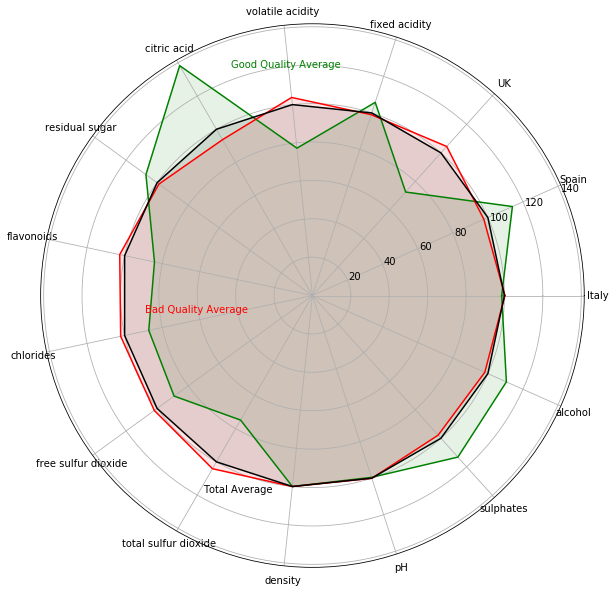

In [18]:
Attributes =list(data_percentage)
AttNo = len(Attributes)

values = data_percentage.iloc[0].tolist() #
values += values [:1]

angles = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
angles += angles [:1]

values2 = data_percentage.iloc[1].tolist() # 
values2 += values2 [:1]

angles2 = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
angles2 += angles2 [:1]

values3 = data_percentage.iloc[2].tolist() # 
values3 += values3 [:1]

angles3 = [n / float(AttNo) * 2 * pi for n in range(AttNo)]
angles3 += angles3 [:1]

plt.figure(figsize=(10,10))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1],Attributes)

# Good 
ax.plot(angles, values, color = 'green')
ax.fill(angles, values, 'green', alpha=0.1)

# Bad
ax.plot(angles2, values2, color = 'red')
ax.fill(angles2, values2, 'red', alpha=0.1)

# Total Average
ax.plot(angles3, values3, color = 'black')
ax.fill(angles3, values3, 'black', alpha=0.1)

plt.figtext(0.4,0.82,'Good Quality Average',color='green')
plt.figtext(0.28,0.48,'Bad Quality Average',color='red')
plt.figtext(0.36,0.23,'Total Average',color='black')
plt.show()

The average radar chart is being used to provide overall overview of relationship of each attributes towards quality of the wine. The chart above is consistent with the correlation scores and conclusion I made previously.

# Applying machine learning algoritms
I will be applying the following algorithms:
1. K-nearest neighbours
2. Neural Network
3. Random Forest Classifiers
4. Gaussian Naive Bayes

The accuracy of the algorithms will be measure based on *classification_report* consisting of *precision, recall, f1-score, support*. 

Then, further analysis will be done using principal component analysis and apply the newly reduced data with different dimension to every algorithms. The mean accuracy score and the ARI scores are recorded.

In [19]:
#Now seperate the dataset as response variable and feature variabes
X = winedata.drop(drop_attrs, axis = 1)
y = winedata['grade']

#Apply KFold for robust cross validation
kf = KFold(n_splits=5,shuffle=True, random_state=0)

for train_idx, test_idx in kf.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
#print(X.head)

(1204, 15)
(300, 15)
(1204,)
(300,)


## 1) k-nearest Neighbour 

In [20]:
k_range = range(1,11)
total1 = 0

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)
    knn_trainscore = knn.score(X_train, y_train) #mean accuracy on the given train data
    knn_testscore = knn.score(X_test, y_test) #mean accuracy on the given test data

    #print(k,"neighbours on train set",knn_trainscore)
    print(k,"neighbours on test set",knn_testscore)
    total1 =+ knn_testscore
print("Mean accuracy score: ", total1/10)
print(classification_report(y_test, knn_pred))

1 neighbours on test set 0.8866666666666667
2 neighbours on test set 0.8933333333333333
3 neighbours on test set 0.8833333333333333
4 neighbours on test set 0.8633333333333333
5 neighbours on test set 0.8733333333333333
6 neighbours on test set 0.8566666666666667
7 neighbours on test set 0.8566666666666667
8 neighbours on test set 0.8466666666666667
9 neighbours on test set 0.85
10 neighbours on test set 0.8566666666666667
Mean accuracy score:  0.08566666666666667
             precision    recall  f1-score   support

          0       0.87      0.98      0.92       257
          1       0.50      0.09      0.16        43

avg / total       0.81      0.86      0.81       300



## 2) Neural network

In [21]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))
mlp.fit(X_train,y_train)
mlp_pred = mlp.predict(X_test)
mlp_testscore = mlp.score(X_test, y_test)
    
print("Mean accuracy score",mlp_testscore)

print(classification_report(y_test,mlp_pred))

Mean accuracy score 0.8566666666666667
             precision    recall  f1-score   support

          0       0.86      1.00      0.92       257
          1       0.00      0.00      0.00        43

avg / total       0.73      0.86      0.79       300



D:\Anaconda\envs\py3iaml\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## 3) Random forest classifier

In [22]:
rt = [10,20,30,40,50]
total2 =0
for i in rt:
    rfc = RandomForestClassifier(n_estimators=50, random_state=i)
    rfc.fit(X_train,y_train)
    rfc_pred = rfc.predict(X_test)
    rfc_trainscore = rfc.score(X_train, y_train)
    rfc_testscore = rfc.score(X_test, y_test)
    
    print("Random state ",i," on test set",rfc_testscore)
    total2 = total2 + rfc_testscore
print("Mean accuracy score: ", total2/5)
print(classification_report(y_test, rfc_pred))

Random state  10  on test set 0.9166666666666666
Random state  20  on test set 0.92
Random state  30  on test set 0.91
Random state  40  on test set 0.9166666666666666
Random state  50  on test set 0.9066666666666666
Mean accuracy score:  0.9139999999999999
             precision    recall  f1-score   support

          0       0.92      0.97      0.95       257
          1       0.76      0.51      0.61        43

avg / total       0.90      0.91      0.90       300



## 4) Gaussian Naive Bayes

In [23]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_pred = gnb.predict(X_test)
gnb_testscore = gnb.score(X_test, y_test)

print("Mean accuracy score",gnb_testscore)
print(classification_report(y_test, gnb_pred))

Mean accuracy score 0.6
             precision    recall  f1-score   support

          0       0.99      0.54      0.70       257
          1       0.26      0.98      0.41        43

avg / total       0.89      0.60      0.66       300



Random forest classifier has the best result with 90%. Then, Gaussian Naive Bayes, k-nearest Neighbour and Neural Network with 89%, 81% and 73% respectively. 

# Apply Principal Component Analysis

This section I am applying different PCA components to every algorithm and identify which algorithm benefits the most through PCA. The measures are based on mean accuracy score and ARI. ARI will computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.

In [24]:
# (1) Try k-nearest Neighbour for different PCA Components
print('\n======== k-nearest Neighbour PCA ========\n')
for ii in range(2, 6):
    X_pca = PCA(n_components = ii).fit_transform(X)
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_pca, y)
    knn_pred = knn.predict(X_pca)
    print('k-Nearest Neighbour on {}D PCA:\nARI: {}, Mean Accuracy: {}\n\n'.
          format(ii, adjusted_rand_score(y, knn_pred), knn.score(X_pca, y)))

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
knn_pred = knn.predict(X)
print('k-Nearest Neighbour on Full Data\nARI: {}, Mean Accuracy: {}\n\n'.
      format(adjusted_rand_score(y, knn_pred), knn.score(X, y)))
print(classification_report(y, knn_pred))


======== k-nearest Neighbour PCA ========

k-Nearest Neighbour on 2D PCA:
ARI: 0.3672667531039969, Mean Accuracy: 0.8856382978723404


k-Nearest Neighbour on 3D PCA:
ARI: 0.4038286638200367, Mean Accuracy: 0.8922872340425532


k-Nearest Neighbour on 4D PCA:
ARI: 0.4751514464604991, Mean Accuracy: 0.9035904255319149


k-Nearest Neighbour on 5D PCA:
ARI: 0.5036717980186163, Mean Accuracy: 0.9082446808510638


k-Nearest Neighbour on Full Data
ARI: 0.5061028473954831, Mean Accuracy: 0.9089095744680851


             precision    recall  f1-score   support

          0       0.93      0.97      0.95      1292
          1       0.75      0.53      0.62       212

avg / total       0.90      0.91      0.90      1504



In [25]:
# (2) Try Neural Network for different PCA Components
print('\n======== Neural Network PCA ========\n')
for ii in range(2, 6):
    X_pca = PCA(n_components = ii).fit_transform(X)
    mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))
    mlp.fit(X_pca, y)
    mlp_pred = mlp.predict(X_pca)
    print('Neural Network on {}D PCA:\nARI: {}, Mean Accuracy: {}\n\n'.
          format(ii, adjusted_rand_score(y, mlp_pred), mlp.score(X_pca, y)))
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))
mlp.fit(X, y)
mlp_pred = mlp.predict(X)
print('Neural Network on Full Data\nARI: {}, Mean Accuracy: {}\n\n'.
      format(adjusted_rand_score(y, mlp_pred), mlp.score(X, y)))
print(classification_report(y, mlp_pred))


======== Neural Network PCA ========

Neural Network on 2D PCA:
ARI: 0.0, Mean Accuracy: 0.8590425531914894


Neural Network on 3D PCA:
ARI: 0.0, Mean Accuracy: 0.8590425531914894


Neural Network on 4D PCA:
ARI: 0.2430781591036611, Mean Accuracy: 0.8690159574468085


Neural Network on 5D PCA:
ARI: 0.278007544515623, Mean Accuracy: 0.8743351063829787


Neural Network on Full Data
ARI: 0.2902500750037661, Mean Accuracy: 0.8776595744680851


             precision    recall  f1-score   support

          0       0.89      0.97      0.93      1292
          1       0.65      0.29      0.40       212

avg / total       0.86      0.88      0.86      1504



In [26]:
# (3) Try Random Forests for different PCA Components
print('\n======== Random Forest PCA ========\n')
for ii in range(2, 6):
    X_pca = PCA(n_components = ii).fit_transform(X)
    rf = RandomForestClassifier(n_estimators=50, random_state=1337, oob_score=True)
    rf.fit(X_pca, y)
    rfc_pred = np.argmax(rf.oob_decision_function_, axis=1)
    print('Random Forests on {}D PCA:\nARI: {}, Mean Accuracy: {}\n\n'.
          format(ii, adjusted_rand_score(y, rfc_pred), rf.oob_score_))
rf = RandomForestClassifier(n_estimators=50, random_state=1000, oob_score=True)
rf.fit(X, y)
rfc_pred = np.argmax(rf.oob_decision_function_, axis=1)
print('Random Forest on Full Data\nARI: {}, Mean Accuracy: {}\n\n'.
      format(adjusted_rand_score(y, rfc_pred), rf.oob_score_))
print(classification_report(y, rfc_pred))


======== Random Forest PCA ========

Random Forests on 2D PCA:
ARI: 0.35677940622933074, Mean Accuracy: 0.8756648936170213


Random Forests on 3D PCA:
ARI: 0.41663984219393063, Mean Accuracy: 0.894281914893617


Random Forests on 4D PCA:
ARI: 0.5044812450748909, Mean Accuracy: 0.9089095744680851


Random Forests on 5D PCA:
ARI: 0.4549467599456756, Mean Accuracy: 0.9009308510638298


Random Forest on Full Data
ARI: 0.5110667852909152, Mean Accuracy: 0.9115691489361702


             precision    recall  f1-score   support

          0       0.93      0.98      0.95      1292
          1       0.78      0.52      0.62       212

avg / total       0.90      0.91      0.90      1504



In [27]:
# (4) Try Gaussian NB for different PCA Components
print('\n======== Gaussian Naive Bayes PCA ========\n')
for ii in range(2, 6):
    X_pca = PCA(n_components = ii).fit_transform(X)
    gnb = GaussianNB()
    gnb.fit(X_pca, y)
    gnb_pred = gnb.predict(X_pca)
    print('Gaussian Naive Bayes on {}D PCA:\nARI: {}, Mean Accuracy: {}\n\n'.
          format(ii, adjusted_rand_score(y, gnb_pred), gnb.score(X_pca, y)))
gnb = GaussianNB()
gnb.fit(X, y)
gnb_pred = gnb.predict(X)
print('Gaussian Naive Bayes on Full Data\nARI: {}, Mean Accuracy: {}\n\n'.
      format(adjusted_rand_score(y, gnb_pred), gnb.score(X, y)))
print(classification_report(y, gnb_pred))


======== Gaussian Naive Bayes PCA ========

Gaussian Naive Bayes on 2D PCA:
ARI: 0.0, Mean Accuracy: 0.8590425531914894


Gaussian Naive Bayes on 3D PCA:
ARI: 0.008726979906104944, Mean Accuracy: 0.8543882978723404


Gaussian Naive Bayes on 4D PCA:
ARI: 0.0585588382041713, Mean Accuracy: 0.8543882978723404


Gaussian Naive Bayes on 5D PCA:
ARI: 0.02829536762201392, Mean Accuracy: 0.8537234042553191


Gaussian Naive Bayes on Full Data
ARI: 0.010771408842973302, Mean Accuracy: 0.5638297872340425


             precision    recall  f1-score   support

          0       0.97      0.51      0.67      1292
          1       0.23      0.91      0.37       212

avg / total       0.87      0.56      0.62      1504



# Results:

Results comparison between with PCA and without PCA.
1. k-nearest neighbour : Accuracy score was 81%. It increases to 90% after applying PCA. PCA components 4 and 5 produced the best results.
2. Neural Network : Accuracy score was 73% . Interestingly, neural network has the biggest jump after applying PCA with 87% accuracy score. It also shows the best result is when PCA component at 5.
3. Random Forest Classifier : Accuracy score was 90%. The accuracy score remains 90% after applying PCA. It seems like applying PCA does not benefits this algorithm.
4. Gaussian Naive Bayes : Accuracy score was 89%. There is only slight decline after applying PCA which is 87%. On top of that it has a worst accuracy score on full data.